EKSİK VERİ 


In [1]:
import numpy as np 
import pandas as pd

In [20]:
V1=np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2=np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3=np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df=pd.DataFrame(
   {"V1" : V1,
    "V2": V2,
    "V3": V3}
)
print(df)

     V1    V2    V3
0   1.0   7.0   NaN
1   3.0   NaN  12.0
2   6.0   5.0   5.0
3   NaN   8.0   6.0
4   7.0  12.0  14.0
5   1.0   NaN   7.0
6   NaN   NaN   NaN
7   9.0   2.0   2.0
8  15.0   3.0  31.0


In [5]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [6]:
df.isnull()

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [7]:
df[df.isnull().any(axis=1)]

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [8]:
df[df.notnull().all(axis=1)]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [9]:
#eksik değerlerin direk silinmesi

In [11]:
df.dropna()


,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [14]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [15]:
#basit değer atama

In [16]:
df["V1"]

0     1.0
1     3.0
2     6.0
3     NaN
4     7.0
5     1.0
6     NaN
7     9.0
8    15.0
Name: V1, dtype: float64

In [17]:
df["V1"].mean()

6.0

In [18]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [19]:
df["V2"].fillna(0)

0     7.0
1     0.0
2     5.0
3     8.0
4    12.0
5     0.0
6     0.0
7     2.0
8     3.0
Name: V2, dtype: float64

In [22]:
df.apply(lambda x: x.fillna(x.mean()),axis=0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


EKSİK DEĞERLERİN SAPTANMASI

In [26]:
#değişkenlerdeki tam değer sayısı
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

In [27]:
#değişkenlerdeki eksik değer sayısı
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [28]:
#değişkenlerdeki toplam eksik değer sayısı
df.isnull().sum().sum()

7

In [29]:
#en az bir eksik değere sahip gözlem sayısı
df[df.isnull().any(axis=1)]

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [30]:
#tüm değerleri tam olan gözlem sayısı
df[df.notnull().all(axis=1)]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


EKSİK VERİ YAPISININ GÖRSELLEŞTİRİLMESİ

In [3]:
!pip install missingno

In [34]:
import missingno as msno

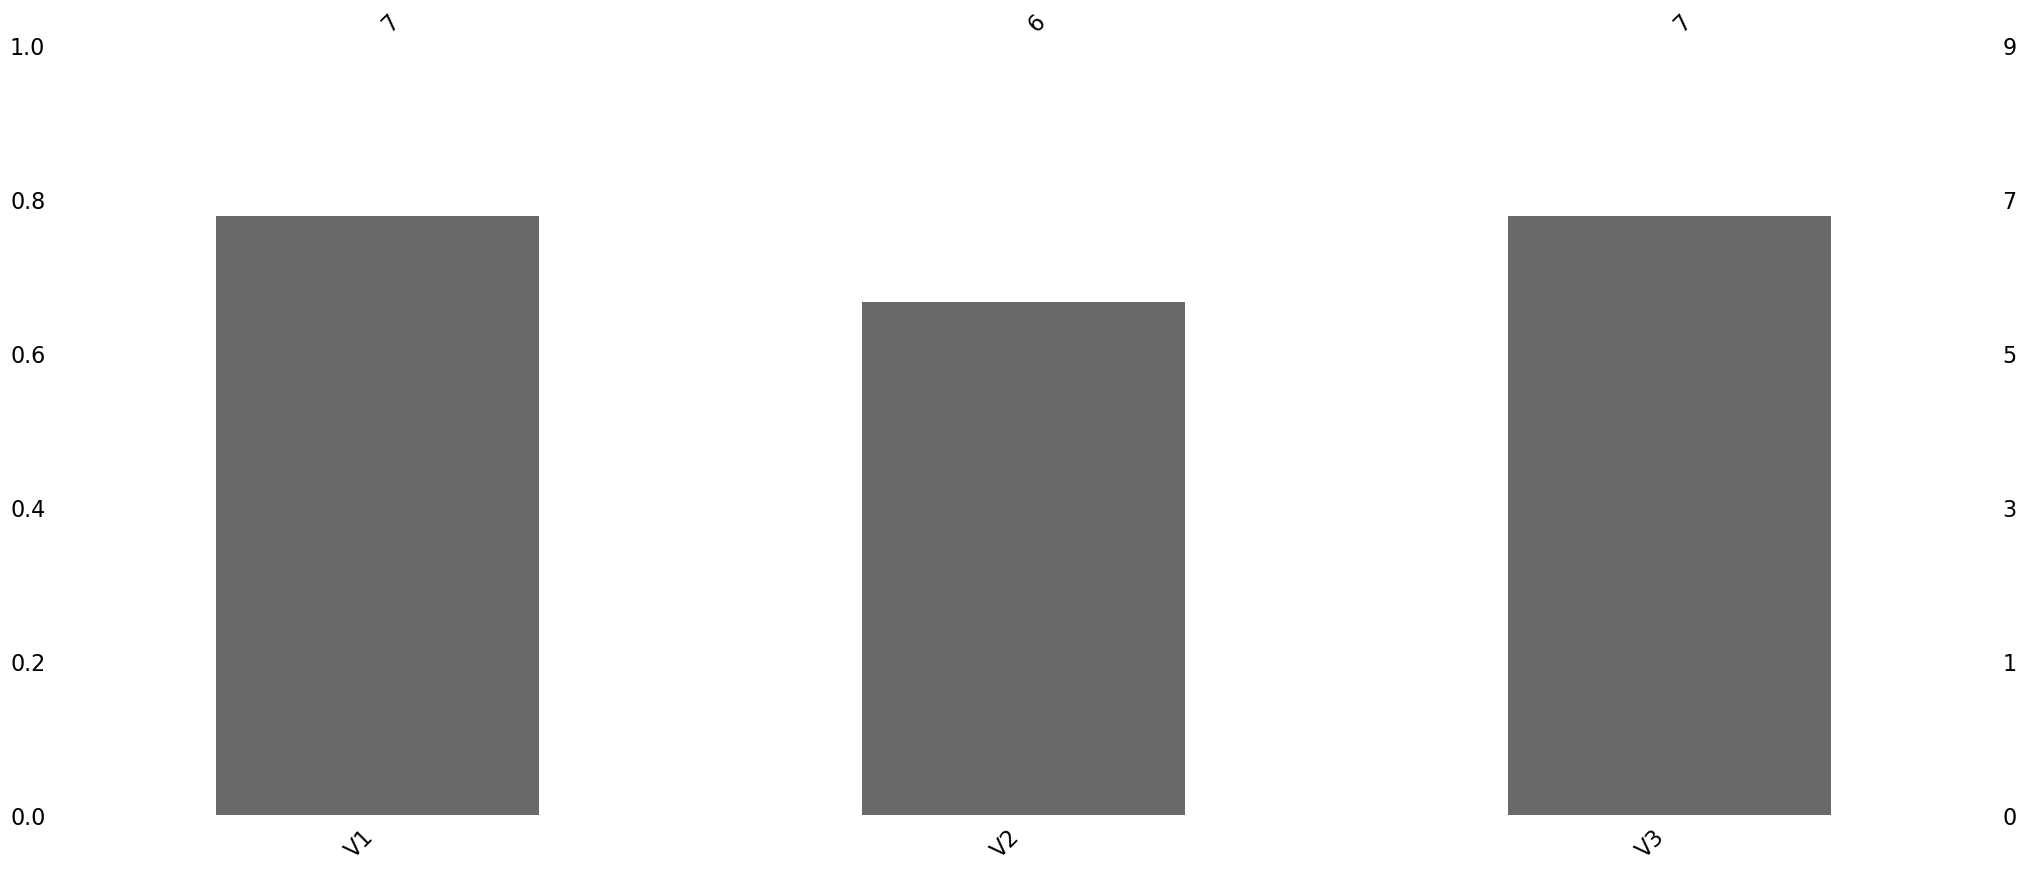

In [36]:
msno.bar(df);

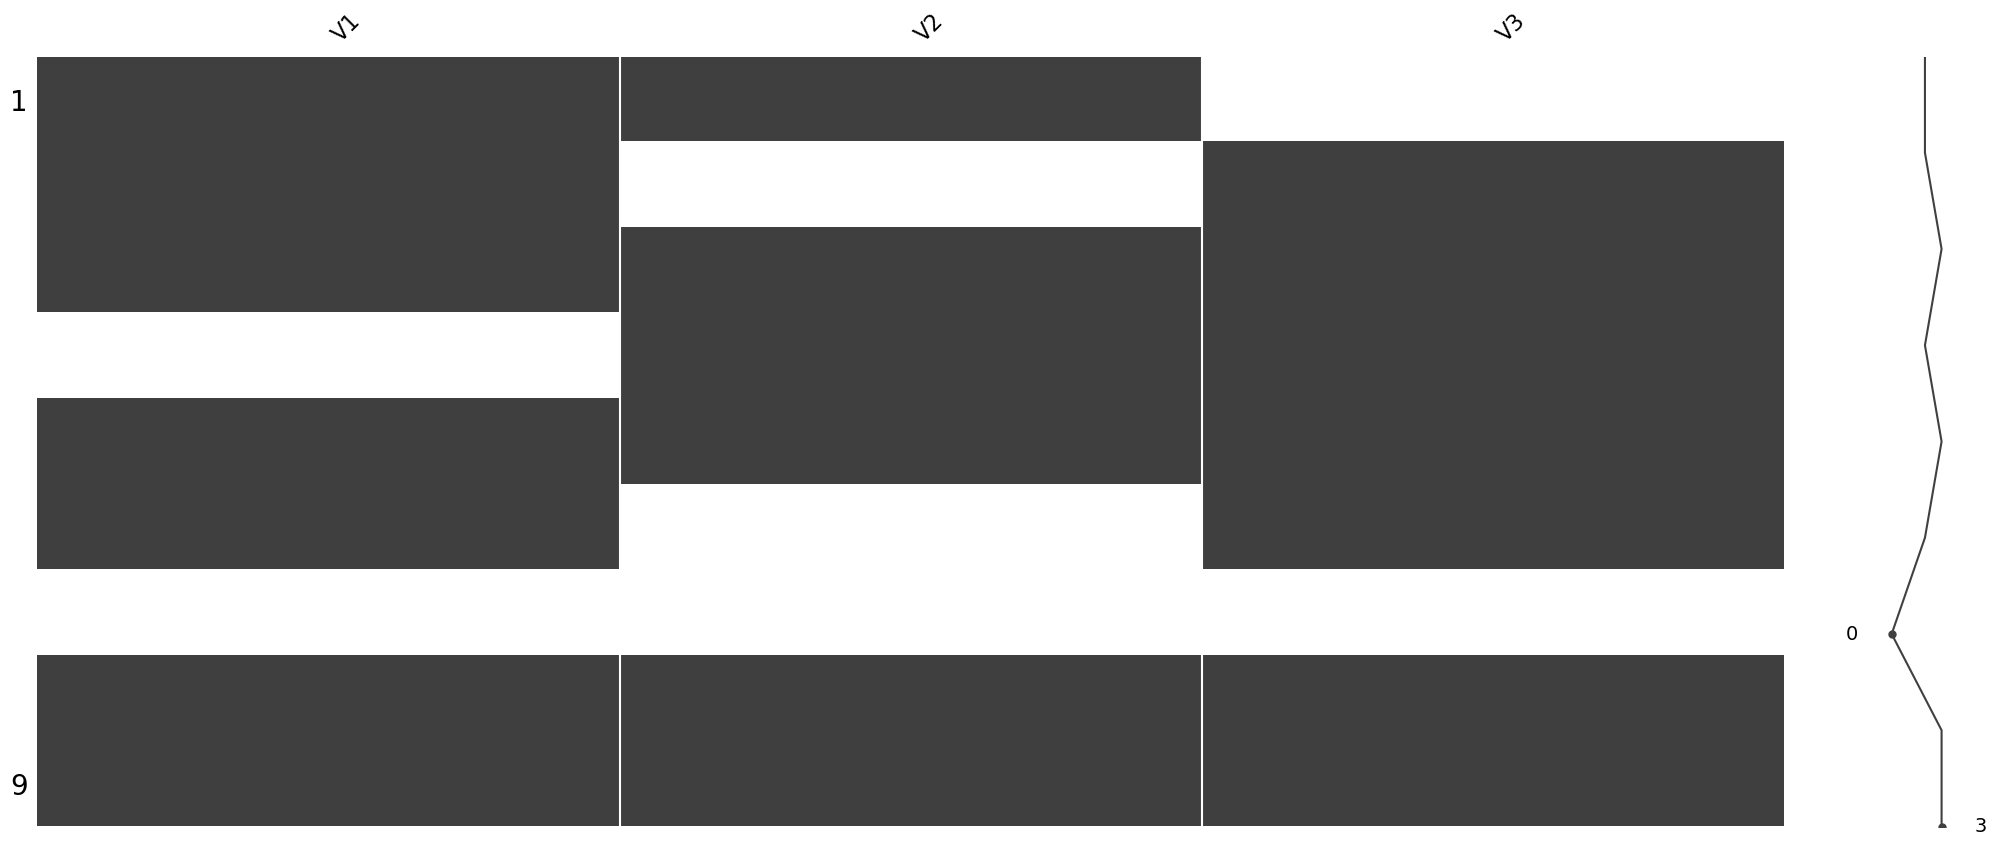

In [37]:
msno.matrix(df);

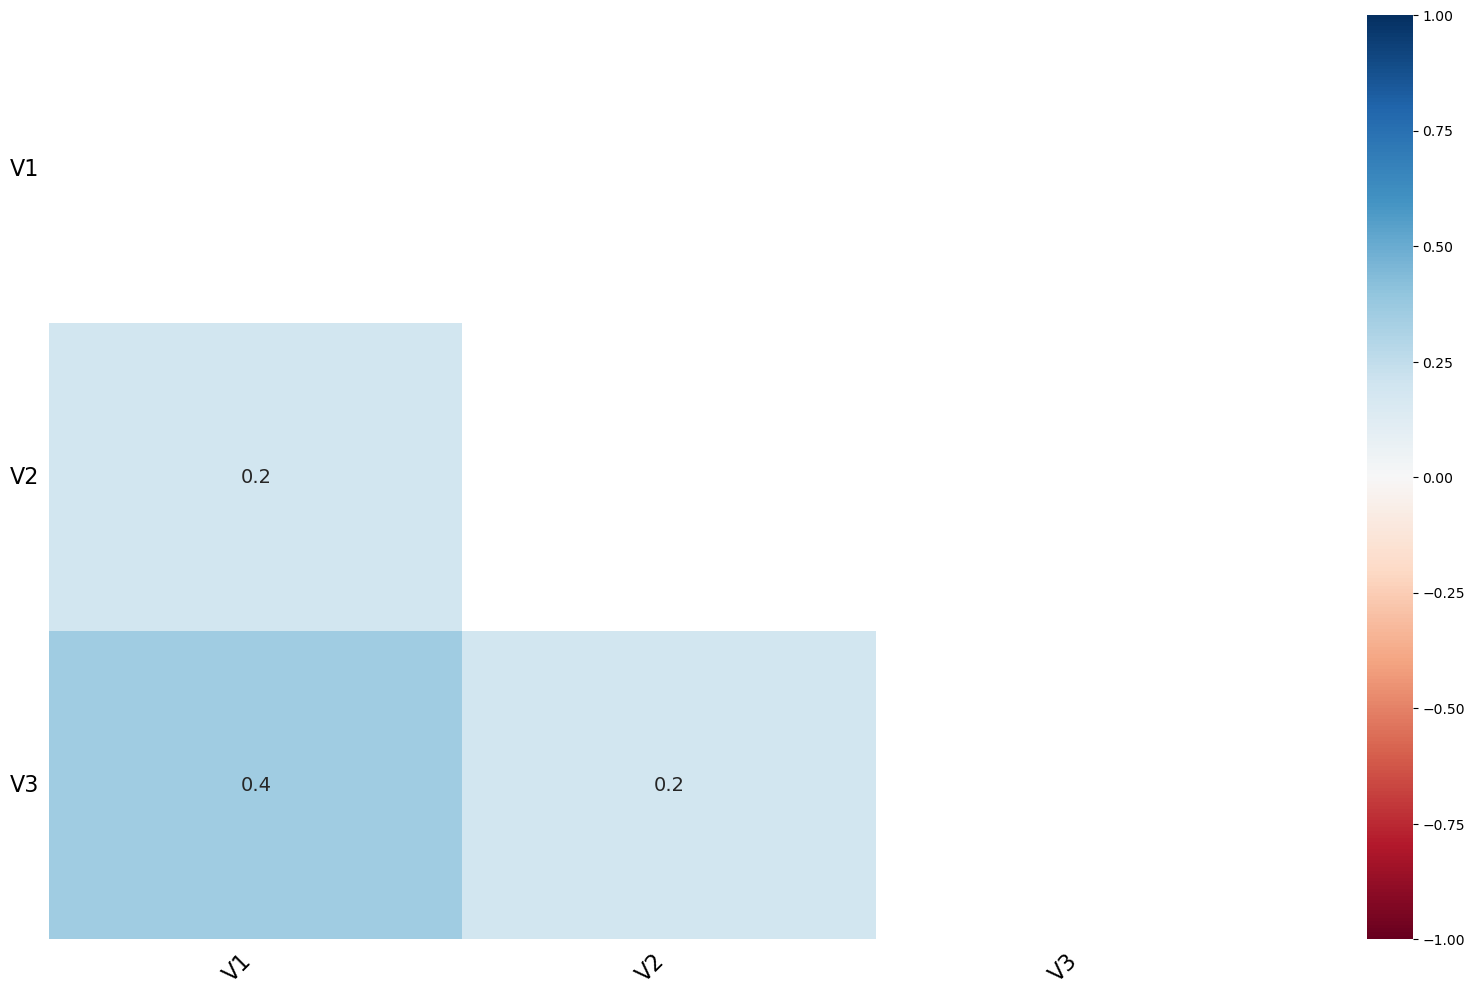

In [39]:
msno.heatmap(df);

DEĞER ATAMA YÖNTEMİ


In [41]:
#sayısal değişkenlerde atama

In [42]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [43]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [45]:
#tüm değişkenler için 1.yol
df.apply(lambda x: x.fillna(x.mean()),axis=0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [46]:
#ikinci yol

In [47]:
df.fillna(df.mean()[:])

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [48]:
df.fillna(df.mean()["V1":"V2"])

,V1,V2,V3
0,1.0,7.000000,NaN
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,NaN
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [50]:
df["V3"].fillna(df["V3"].median())

0     7.0
1    12.0
2     5.0
3     6.0
4    14.0
5     7.0
6     7.0
7     2.0
8    31.0
Name: V3, dtype: float64

In [51]:
#üçüncü yol

In [52]:
df.where(pd.notna(df),df.mean(),axis="columns")

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


KATEGORİK DEĞİŞKEN KIRILIMINDA DEĞER ATAMA

In [54]:
V1=np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2=np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3=np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4=np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df=pd.DataFrame(
   {"maaş" : V1,
    "V2": V2,
    "V3": V3,
   "departman" : V4}
)
print(df)

   maaş    V2    V3 departman
0   1.0   7.0   NaN        IT
1   3.0   NaN  12.0        IT
2   6.0   5.0   5.0        IK
3   NaN   8.0   6.0        IK
4   7.0  12.0  14.0        IK
5   1.0   NaN   7.0        IK
6   NaN   NaN   NaN        IK
7   9.0   2.0   2.0        IT
8  15.0   3.0  31.0        IT


In [55]:
df.groupby("departman")["maaş"].mean()

departman
IK    4.666667
IT    7.000000
Name: maaş, dtype: float64

In [56]:
df["maaş"].fillna(df.groupby("departman")["maaş"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maaş, dtype: float64

KATEGORİK DEĞİŞKENLER İÇİN EKSİK DEĞER ATAMA

In [58]:
V1=np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4=np.array(["IT",np.NaN,"IK","IK","IK","IK","IK","IT","IT"],dtype=object)

df=pd.DataFrame(
   {"maaş" : V1,
   "departman" : V4}
)
print(df)

   maaş departman
0   1.0        IT
1   3.0       NaN
2   6.0        IK
3   NaN        IK
4   7.0        IK
5   1.0        IK
6   NaN        IK
7   9.0        IT
8  15.0        IT


In [60]:
df["departman"].fillna(df["departman"].mode()[0])

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [61]:
df["departman"].fillna(method="bfill")

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [62]:
df["departman"].fillna(method="ffill")

0    IT
1    IT
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object